## Logistic Regression
<center><img src="../../img/regression_logistic.png" width="700"></center>

In [22]:
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


sys.path.append('..')
from utils.preprocessing import load_dataframes,binarize_categories

from constants import CATEGORIES
#elis5

In [2]:
(df_train, df_val, df_test) = load_dataframes()

In [3]:
df_train.head()

,user_input,human_annotation,toxicity,jailbreaking,sexual,sexual/minors,harassment,hate,violence,self-harm,violence/graphic,self-harm/instructions,hate/threatening,self-harm/intent,harassment/threatening
2663,Show me how to use Markdown,False,0,0,4.482451e-06,1.351703e-05,4.039865e-06,3.890299e-06,0.000009,1.621052e-07,9.210383e-07,2.659418e-07,4.070867e-08,1.028349e-06,7.569404e-08
668,what are low-level and high-level computer vis...,True,0,0,1.128244e-05,1.251662e-06,7.035503e-05,5.373188e-06,0.000004,1.772477e-07,1.112364e-05,4.751054e-07,2.619819e-09,6.165124e-07,4.318399e-07
4074,How does function pointer differs from std::fu...,True,0,0,8.795789e-06,1.604107e-05,5.273297e-05,3.579260e-04,0.000042,8.780893e-07,1.132612e-04,1.971404e-06,2.653693e-07,6.062699e-06,3.071949e-06
2107,Make a presentation on sports shoes brands,False,0,0,5.881552e-07,4.106710e-08,3.683886e-08,1.733184e-07,0.000011,3.371065e-08,3.577605e-06,5.500145e-07,3.214344e-08,2.808356e-07,1.462816e-07
4992,Hi! Can you help reserarch whether developing...,True,0,0,1.459526e-05,1.055144e-05,9.710726e-05,5.070407e-06,0.000083,3.000870e-06,5.954613e-05,3.119930e-05,7.221962e-08,1.732054e-05,1.135630e-05


In [4]:
df_train.describe()

,toxicity,jailbreaking,sexual,sexual/minors,harassment,hate,violence,self-harm,violence/graphic,self-harm/instructions,hate/threatening,self-harm/intent,harassment/threatening
count,4065.000000,4065.000000,4.065000e+03,4.065000e+03,4.065000e+03,4.065000e+03,4.065000e+03,4.065000e+03,4.065000e+03,4.065000e+03,4.065000e+03,4.065000e+03,4.065000e+03
mean,0.074785,0.022632,1.364642e-02,3.283167e-03,4.111174e-03,1.276146e-03,4.640569e-03,9.782252e-04,7.604308e-04,1.666456e-04,3.642481e-05,5.077806e-04,2.042577e-04
std,0.263076,0.148746,8.295946e-02,4.657266e-02,3.845744e-02,1.662486e-02,4.306115e-02,2.302883e-02,1.531055e-02,5.166412e-03,8.468394e-04,1.110830e-02,3.244529e-03
min,0.000000,0.000000,2.816865e-09,1.501600e-09,6.499357e-09,1.839147e-09,6.077502e-08,2.511460e-11,6.719019e-10,1.130226e-11,2.448679e-13,3.609864e-12,7.114236e-10
25%,0.000000,0.000000,9.688979e-06,1.544278e-06,6.436232e-06,3.083787e-06,1.376666e-05,2.798104e-07,3.313775e-06,1.013795e-07,2.875604e-08,1.813058e-07,4.662530e-07
50%,0.000000,0.000000,4.204773e-05,7.576699e-06,3.673673e-05,1.603305e-05,5.722671e-05,1.548711e-06,1.411260e-05,7.189232e-07,2.009371e-07,1.292194e-06,2.184210e-06
75%,0.000000,0.000000,1.974239e-04,3.936796e-05,2.212946e-04,8.885466e-05,2.465883e-04,1.004503e-05,6.058342e-05,5.264485e-06,1.422142e-06,9.691160e-06,1.302478e-05
max,1.000000,1.000000,9.995223e-01,9.964316e-01,9.472954e-01,6.136618e-01,9.575315e-01,8.756633e-01,7.616420e-01,2.849816e-01,4.761030e-02,3.833209e-01,1.350671e-01


## Binomial Classification

In [24]:
vectorizer = TfidfVectorizer(stop_words='english')

X_train = vectorizer.fit_transform(df_train['user_input'])
X_valid = vectorizer.transform(df_val['user_input'])
X_test = vectorizer.transform(df_test['user_input'])

y_train = df_train['toxicity']
y_valid = df_val['toxicity']
y_test = df_test['toxicity']

##### By default it's L2 regularization

In [41]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print(model.score(X_valid, y_valid))
y_pred = model.predict(X_valid)
print(classification_report(y_valid, y_pred, target_names=['non-toxic', 'toxic']))


0.9321533923303835
              precision    recall  f1-score   support

   non-toxic       0.93      1.00      0.96       937
       toxic       1.00      0.14      0.24        80

    accuracy                           0.93      1017
   macro avg       0.97      0.57      0.60      1017
weighted avg       0.94      0.93      0.91      1017



#### Let's try with different regularization values


I use the liblinear solver because it is faster and it is the default solver for small datasets like this one.\
C is the inverse of the regularization strength. Smaller values specify stronger regularization.

In [43]:
model_l1 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
model_l1.fit(X_train, y_train)
model_l1.score(X_valid, y_valid)
y_pred = model_l1.predict(X_valid)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       937
           1       0.00      0.00      0.00        80

    accuracy                           0.92      1017
   macro avg       0.46      0.50      0.48      1017
weighted avg       0.85      0.92      0.88      1017



/Users/camilziane/.pyenv/versions/3.11.6/envs/nlp_project/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/camilziane/.pyenv/versions/3.11.6/envs/nlp_project/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/camilziane/.pyenv/versions/3.11.6/envs/nlp_project/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

In [44]:
model_no_penalty = LogisticRegression(penalty=None, C=0.1)
model_no_penalty.fit(X_train, y_train)
model_no_penalty.score(X_valid, y_valid)
print(model_no_penalty.score(X_valid, y_valid))
y_pred = model_no_penalty.predict(X_valid)
print(classification_report(y_valid, y_pred))

/Users/camilziane/.pyenv/versions/3.11.6/envs/nlp_project/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


0.9616519174041298
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       937
           1       0.85      0.62      0.72        80

    accuracy                           0.96      1017
   macro avg       0.91      0.81      0.85      1017
weighted avg       0.96      0.96      0.96      1017



#### Now let's try all combinations of the logistic regression parameters

In [45]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.001, 0.01, 0.1, 1, 10, 100],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

logistic = LogisticRegression()

clf = GridSearchCV(logistic, param_grid, cv=5, verbose=True, n_jobs=-1)

best_clf = clf.fit(X_train, y_train)

print("Best Parameters: ", best_clf.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/Users/camilziane/.pyenv/versions/3.11.6/envs/nlp_project/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/camilziane/.pyenv/versions/3.11.6/envs/nlp_project/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/camilziane/.pyenv/versions/3.11.6/envs/nlp_project/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/camilziane/.pyenv/versions/3.11.6/envs/nlp_project/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/camilziane/.pyenv/versions/3.11.6/envs/nlp_project/lib/python3.11/site-packages/sklearn/linear_model/_sag

Best Parameters:  {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


/Users/camilziane/.pyenv/versions/3.11.6/envs/nlp_project/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
390 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/camilziane/.pyenv/versions/3.11.6/envs/nlp_project/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/camilziane/.pyenv/versions/3.11.6/envs/nlp_project/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^

#### So the best parameters looks like to be  {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

Let's try with the best parameters on the validation set

In [46]:
best_model = best_clf.best_estimator_
best_model.score(X_valid, y_valid)

0.960668633235005

#### Let's try with the model on the test set

In [53]:
best_model.score(X_test, y_test)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['non-toxic', 'toxic']))

              precision    recall  f1-score   support

   non-toxic       0.96      0.99      0.98      4721
       toxic       0.80      0.52      0.63       362

    accuracy                           0.96      5083
   macro avg       0.88      0.76      0.81      5083
weighted avg       0.95      0.96      0.95      5083



# Shap Value

View the most important features

In [116]:
import numpy as np
import shap

For each feature there is a lot of 0 shap value. That means that for a feature there is a lot of row which are not very dependent. It could be explained by the fact the X_train is a sparse matrix and for a lot of input the majority of words are not represented.

/Users/camilziane/.pyenv/versions/3.11.6/envs/nlp_project/lib/python3.11/site-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)
/Users/camilziane/.pyenv/versions/3.11.6/envs/nlp_project/lib/python3.11/site-packages/shap/explainers/_linear.py:210: UserWarning: Setting nsamples has no effect when feature_perturbation = 'interventional'!
  warnings.warn("Setting nsamples has no effect when feature_perturbation = 'interventional'!")


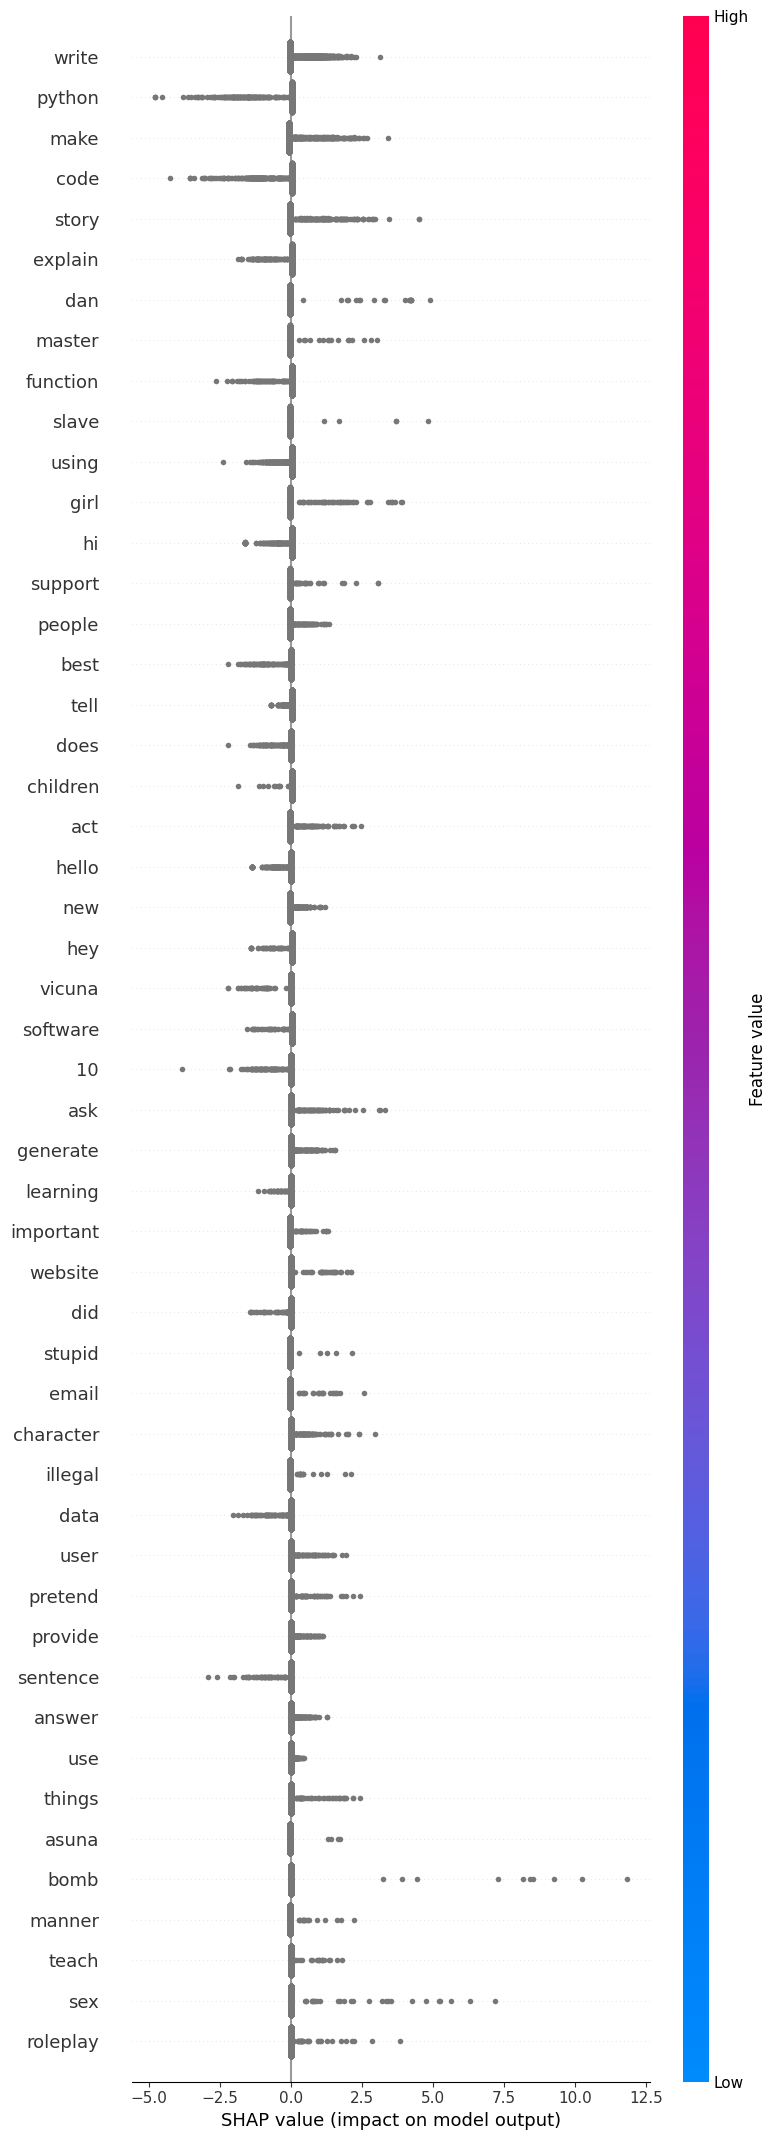

In [117]:
explainer = shap.LinearExplainer(best_model, X_train, feature_perturbation="interventional", nsamples=5000)    

shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, feature_names=vectorizer.get_feature_names_out(), max_display=50)


To view the more toxic word let just print the max shap value of each word/feature

/Users/camilziane/.pyenv/versions/3.11.6/envs/nlp_project/lib/python3.11/site-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)
/Users/camilziane/.pyenv/versions/3.11.6/envs/nlp_project/lib/python3.11/site-packages/shap/explainers/_linear.py:210: UserWarning: Setting nsamples has no effect when feature_perturbation = 'interventional'!
  warnings.warn("Setting nsamples has no effect when feature_perturbation = 'interventional'!")


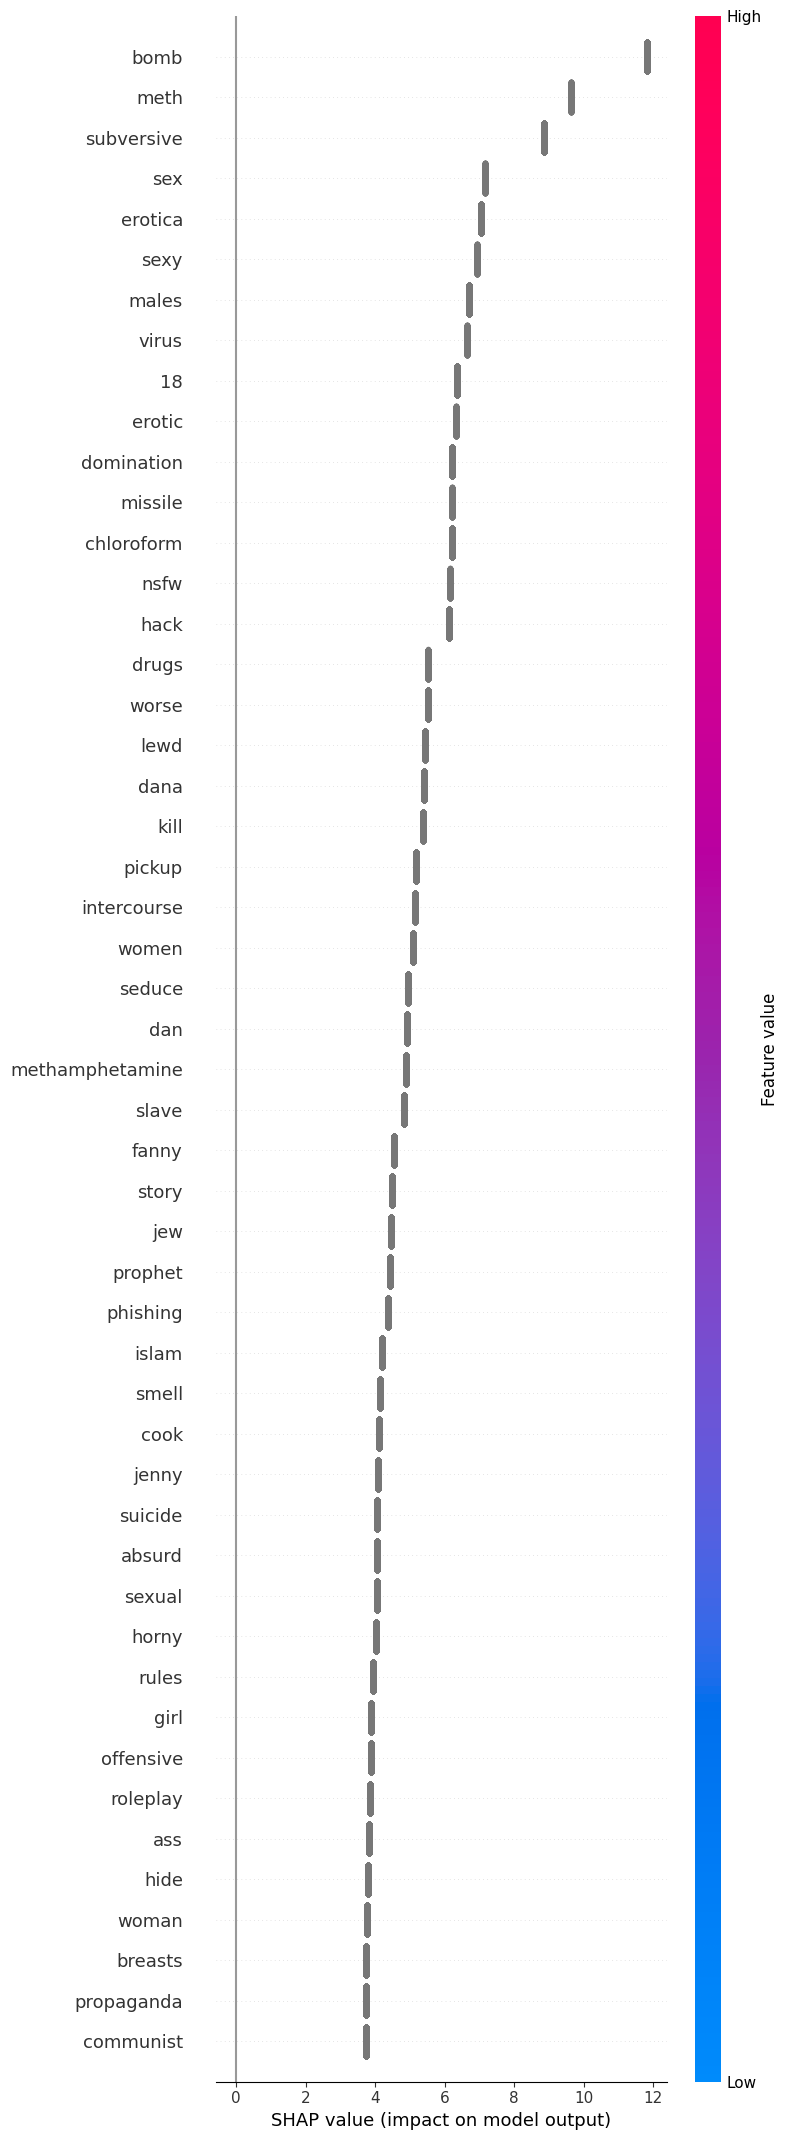

In [118]:
#View the most important features with shap values


explainer = shap.LinearExplainer(best_model, X_train, feature_perturbation="interventional", nsamples=5000)    

shap_values = explainer.shap_values(X_train)
shap.summary_plot(np.repeat(np.max(shap_values, axis=0).reshape(1,-1),X_train.shape[0],axis=0), X_train, feature_names=vectorizer.get_feature_names_out(), max_display=50)
#View the most important features but with the highest absolute shap values but exclude in the mean shap value equals 0

Here it is the more toxic word !

# Word to vec

In [12]:
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report
from gensim.models import Word2Vec, KeyedVectors
import numpy as np

In [13]:
data = [word_tokenize(s)for s in  df_train["user_input"]]

In [14]:
model_vector = Word2Vec(sentences=data, min_count=1, window=10, workers=4, vector_size=100)

In [15]:
def vectorize(data):
    X = []
    for doc in data:
        doc_vec = np.mean([model_vector.wv[word] for word in word_tokenize(doc) if word in model_vector.wv], axis=0)
        X.append(doc_vec)
    return X

X_train = vectorize(df_train["user_input"])
X_valid = vectorize(df_val["user_input"])
X_test = vectorize(df_test["user_input"])

/Users/camilziane/.pyenv/versions/3.11.6/envs/nlp_project/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/camilziane/.pyenv/versions/3.11.6/envs/nlp_project/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [16]:
y_train = df_train['toxicity']
y_valid = df_val['toxicity']
y_test = df_test['toxicity']

In [17]:
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)
model.predict(X_valid)
print(classification_report(y_valid, model.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       937
           1       0.00      0.00      0.00        80

    accuracy                           0.92      1017
   macro avg       0.46      0.50      0.48      1017
weighted avg       0.85      0.92      0.88      1017



/Users/camilziane/.pyenv/versions/3.11.6/envs/nlp_project/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/camilziane/.pyenv/versions/3.11.6/envs/nlp_project/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/camilziane/.pyenv/versions/3.11.6/envs/nlp_project/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

### Multinomial Logistic Regression

In [18]:
df_train = binarize_categories(df_train)
df_val = binarize_categories(df_val)
df_test = binarize_categories(df_test)

In [19]:
df_train['max_value'] = df_train[CATEGORIES].idxmax(axis=1).apply(lambda x: CATEGORIES.index(x))
df_val['max_value'] = df_val[CATEGORIES].idxmax(axis=1).apply(lambda x: CATEGORIES.index(x))
df_test['max_value'] = df_test[CATEGORIES].idxmax(axis=1).apply(lambda x: CATEGORIES.index(x))

In [20]:
y_train = df_train['max_value']
y_valid = df_val['max_value']
y_test = df_test['max_value']

y_train.value_counts()

0    3927
2      60
4      46
3      13
1       8
5       8
7       1
6       1
9       1
Name: max_value, dtype: int64

#### The data is not equally distributed so I will use the class_weight='balanced' parameter to balance the classes but it is not enough

In [21]:
multinomial_model= LogisticRegression(multi_class='multinomial', max_iter=1000 , class_weight='balanced')

In [41]:
model.fit(X_train, y_train)
print(classification_report(y_valid, model.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       981
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        18

    accuracy                           0.96      1017
   macro avg       0.19      0.20      0.20      1017
weighted avg       0.93      0.96      0.95      1017



/Users/eithannakache/.pyenv/versions/3.12.2/envs/SCIA/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/eithannakache/.pyenv/versions/3.12.2/envs/SCIA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eithannakache/.pyenv/versions/3.12.2/envs/SCIA/lib/python3.12/site-packages/sklearn/